**To understand Linear Regression better,
Firstly I will code Linear Regression with Formula then use ScikitLearn module and we will able to 
compare.**

---

**Lineer Regresyonu daha iyi anlamak adına
İlk önce Lineer Regresyonu formülle hesaplayıp daha sonra SckitLearn kütüphanesiyle aynı işlemi yapacağız ve karşılaştırağız.**

**Dataset= car_crashes in seaborn**

**Firstly we load dataset from seaborn**

In [1]:
import seaborn as sns
data=sns.load_dataset("car_crashes")
df=data.copy()
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


**And we try to understand dataset**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
total             51 non-null float64
speeding          51 non-null float64
alcohol           51 non-null float64
not_distracted    51 non-null float64
no_previous       51 non-null float64
ins_premium       51 non-null float64
ins_losses        51 non-null float64
abbrev            51 non-null object
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total,51.0,15.790196,4.122002,5.900,12.7500,15.600,18.500,23.900
speeding,51.0,4.998196,2.017747,1.792,3.7665,4.608,6.439,9.450
alcohol,51.0,4.886784,1.729133,1.593,3.8940,4.554,5.604,10.038
not_distracted,51.0,13.573176,4.508977,1.760,10.4780,13.857,16.140,23.661
no_previous,51.0,14.004882,3.764672,5.900,11.3480,13.775,16.755,21.280
ins_premium,51.0,886.957647,178.296285,641.960,768.4300,858.970,1007.945,1301.520
ins_losses,51.0,134.493137,24.835922,82.750,114.6450,136.050,151.870,194.780


Looking for missing values

In [4]:
df.isnull().values.any()

False

**We look correlation between variables. And we see alcohol and total have high correlation relation**. 

**And decide to alcohol is independent variable and total is dependent variable for our example.**

In [5]:
df.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


In [6]:
alcohol=df["alcohol"] #independent variable
total=df["total"] #dependent variable
len(alcohol)

51

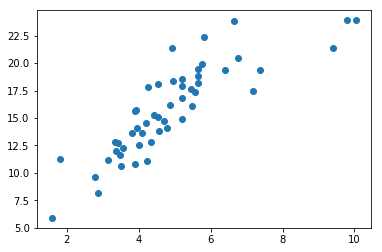

In [7]:
import matplotlib.pyplot as plt
plt.scatter(alcohol,total)

**We will use this formula**

![alt text](https://usercontent1.hubstatic.com/7429276_f520.jpg)


**y = A + Bx**

In [8]:
t_y=sum(total)
t_x=sum(alcohol)
xy=sum(total*alcohol)
x2=sum(alcohol**2)
A= ((t_y*x2) - (t_x*xy)) / ((51*x2) - (t_x**2))
B=((51*xy) - (t_x*t_y)) / ((51*x2) - (t_x**2))
print("A: ", A)
print("B: ",B)

A:  5.857776154826259
B:  2.032506303932418


**Now we use ScikitLearn**

In [0]:
from sklearn.linear_model import LinearRegression
alcohol=df[["alcohol"]]
reg=LinearRegression()
model=reg.fit(alcohol,total)

In [10]:
print("A: ",model.intercept_)
print("B: ",model.coef_)

A:  5.857776154826299
B:  [2.0325063]


**Our formula**

In [11]:
print("Total= "+ str("%.2f "%A) + "+ alcohol" + "*" + str("%.2f"%B))

Total= 5.86 + alcohol*2.03


**And we have achieved the same result.**

**Let's visualize our results.**

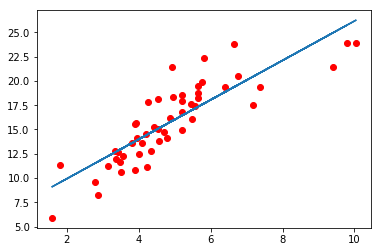

In [12]:
Total=A + B*alcohol
plt.scatter(alcohol,total,color="r")
plt.plot(alcohol,Total)
plt.show()

**Predict**


Let's compare the predicted values with the actual values

In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
total_pred=model.predict(alcohol)
total_pred[0:10]

array([17.32111171, 15.05486718, 16.44306899, 17.69509287, 12.68699734,
       13.59756016, 13.76016066, 15.73575679,  9.0955587 , 16.40851638])

In [31]:
total[0:10]

0    18.8
1    18.1
2    18.6
3    22.4
4    12.0
5    13.6
6    10.8
7    16.2
8     5.9
9    17.9
Name: total, dtype: float64

Calculate RMSE and R Squared Score

For information: [RMSE and R2](https://www.datatechnotes.com/2019/02/regression-model-accuracy-mae-mse-rmse.html)

In [36]:
rmse=np.sqrt(mean_squared_error(total,total_pred))
print("RMSE: ",rmse)
print("R Squared Score: ",r2_score(total,total_pred))

RMSE:  2.132700058579433
R Squared Score:  0.7269492966665405


In [33]:
model.predict([[2.5]])

array([10.93904191])